In [14]:
import sklearn.svm
from sklearn.metrics import accuracy_score
from ipynb.fs.full.Functions import load_train_test_data, load_train_test_oversampled, run_gridsearchCV, load_model, model_eval, run_randomizedsearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 

from sklearn import tree
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import svm

# turn of warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
models_dict = {
    'DecisionTreeClassifier': tree.DecisionTreeClassifier(random_state=0),
    'LogisticRegression': LogisticRegression(random_state=0),
    'RandomForestClassifier': ensemble.RandomForestClassifier(random_state=0),
    'XGBClassifier': xgb.XGBClassifier(seed=0),
    'SVC': svm.SVC(random_state=0),
#     'NeuralNetwork': None
}
search = ['grid', 'random']
scorings_dict = {'accuracy': accuracy_score, 
                'recall': recall_score}

### Function to find best models

In [16]:
def find_best_models(X_train, X_test, y_train, y_test, ros=''):
    best_model_dict = {}
    for scoring, func in scorings_dict.items():
        best_model = None
        best_score = 0

        for name, model in models_dict.items():
            for s in search:
                saved_model = load_model(model, scoring, ros=ros, search=s)
                if(saved_model is None):
                    continue
                pred_train = saved_model.predict(X_train)
                pred_test = saved_model.predict(X_test)
                v_train =  func(y_train, pred_train)
                v_test = func(y_test, pred_test)
                
                if v_test > best_score:
                    best_model = saved_model
                    best_score = v_test
                print('scoring: {}, model: {}, search:{}, score: {:.2f}%'
                      .format(scoring, name, s, v_test*100))

            best_model_dict[scoring] = best_model
            
    return best_model_dict

# 1) Find best model with normal preprocessed dataset

In [17]:
# load the preprocessed data set
X_train, X_test, y_train, y_test = load_train_test_data()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
188,3.0,0.0,-0.514087,-0.775318,-0.293345,0.0,1.0,2.0,-0.416387,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
145,0.0,2.0,-1.261602,0.026431,-0.293345,0.0,0.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
87,3.0,1.0,-2.009116,-2.378816,-0.838128,0.0,2.0,2.0,-0.416387,1.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
262,3.0,2.0,-0.887844,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
45,1.0,1.0,-0.887844,-0.775318,0.251438,0.0,1.0,0.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 232 entries with 18 columns in our training data.
There are 41 entries with 18 columns in our testing data.


### Best model with normal preprocessed dataset

In [18]:
best_model_dict = find_best_models(X_train, X_test, y_train, y_test)

scoring: accuracy, model: DecisionTreeClassifier, search:grid, score: 73.17%
scoring: accuracy, model: DecisionTreeClassifier, search:random, score: 75.61%
scoring: accuracy, model: LogisticRegression, search:grid, score: 80.49%
scoring: accuracy, model: LogisticRegression, search:random, score: 78.05%
scoring: accuracy, model: RandomForestClassifier, search:grid, score: 85.37%
scoring: accuracy, model: RandomForestClassifier, search:random, score: 85.37%
scoring: accuracy, model: XGBClassifier, search:grid, score: 78.05%
scoring: accuracy, model: XGBClassifier, search:random, score: 78.05%
scoring: accuracy, model: SVC, search:grid, score: 80.49%
scoring: accuracy, model: SVC, search:random, score: 80.49%
scoring: recall, model: DecisionTreeClassifier, search:grid, score: 53.85%
scoring: recall, model: DecisionTreeClassifier, search:random, score: 69.23%
scoring: recall, model: LogisticRegression, search:grid, score: 53.85%
scoring: recall, model: LogisticRegression, search:random, sc

Accuracy best model: RandomForestClassifier evaluation

Evaluation: accuracy_score
88.79% for the train data
85.37% for the test data

Evaluation: f1_score
82.19% for the train data
75.00% for the test data

Evaluation: recall_score
80.00% for the train data
69.23% for the test data

Evaluation: precision_score
84.51% for the train data
81.82% for the test data

Evaluation: confusion_matrix


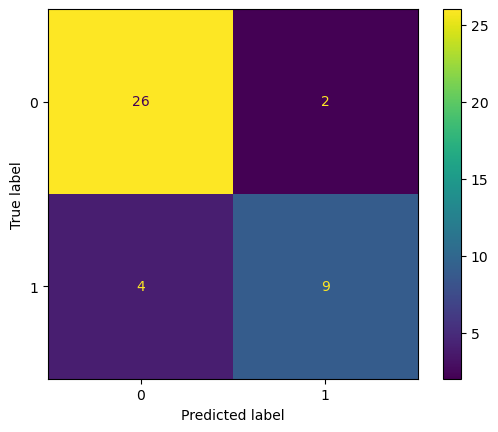


Evaluation: roc


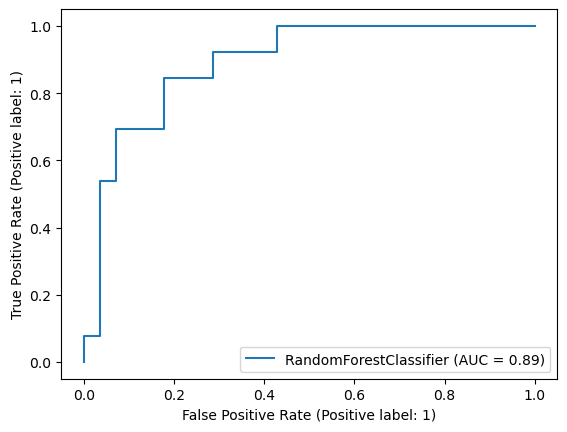

[(0.8879310344827587, 0.8536585365853658),
 (0.821917808219178, 0.7500000000000001),
 (0.8, 0.6923076923076923),
 (0.8450704225352113, 0.8181818181818182)]

In [19]:
print('Accuracy best model: {} evaluation'.format(type(best_model_dict['accuracy']).__name__))
model_eval(best_model_dict['accuracy'], X_train, X_test, y_train, y_test, confusion=True, roc=True)

Recall best model: SVC evaluation

Evaluation: accuracy_score
79.31% for the train data
78.05% for the test data

Evaluation: f1_score
73.33% for the train data
74.29% for the test data

Evaluation: recall_score
88.00% for the train data
100.00% for the test data

Evaluation: precision_score
62.86% for the train data
59.09% for the test data

Evaluation: confusion_matrix


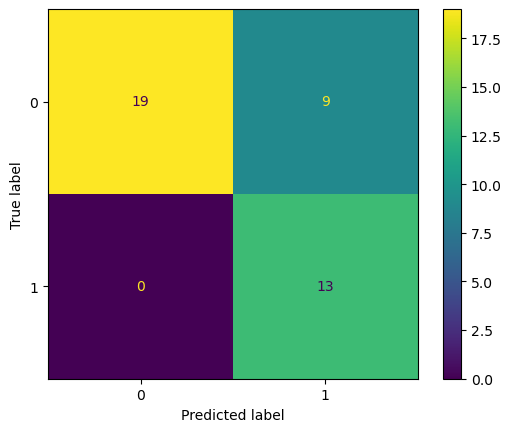


Evaluation: roc


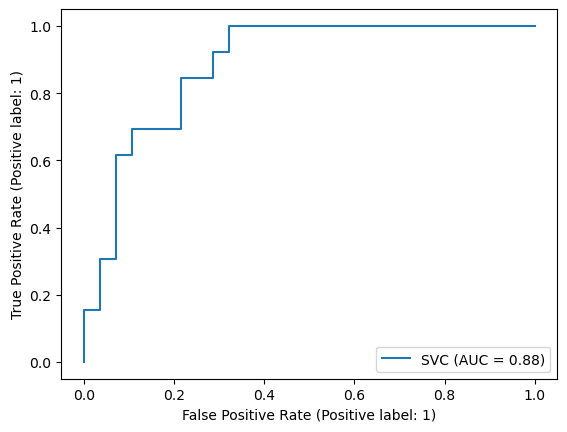

[(0.7931034482758621, 0.7804878048780488),
 (0.7333333333333334, 0.7428571428571429),
 (0.88, 1.0),
 (0.6285714285714286, 0.5909090909090909)]

In [20]:
print('Recall best model: {} evaluation'.format(type(best_model_dict['recall']).__name__))
model_eval(best_model_dict['recall'], X_train, X_test, y_train, y_test, confusion=True, roc=True)

# 2) Find best model with oversample preprocessed dataset

In [21]:
X_train2, X_test2, y_train2, y_test2 = load_train_test_oversampled()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,highBP_yes,RegularMedicine_yes,Pdiabetes_yes,Alcohol_yes,Gender_Male,Smoking_yes,Family_Diabetes_yes
0,0.0,2.0,1.354699,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,0.794063,-0.775318,-1.927694,1.0,3.0,2.0,-0.416387,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3.0,1.0,0.420306,0.828180,1.341005,0.0,0.0,1.0,-0.416387,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,2.0,2.289092,0.828180,-0.838128,0.0,1.0,1.0,-0.416387,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,-0.514087,-1.577067,-0.293345,3.0,1.0,1.0,-0.416387,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


There are 258 entries with 18 columns in our training data.
There are 82 entries with 18 columns in our testing data.


In [22]:
best_model_dict2 = find_best_models(X_train2, X_test2, y_train2, y_test2, ros='ros')

scoring: accuracy, model: DecisionTreeClassifier, search:grid, score: 70.73%
scoring: accuracy, model: DecisionTreeClassifier, search:random, score: 69.51%
scoring: accuracy, model: LogisticRegression, search:grid, score: 67.07%
scoring: accuracy, model: LogisticRegression, search:random, score: 69.51%
scoring: accuracy, model: RandomForestClassifier, search:grid, score: 70.73%
scoring: accuracy, model: RandomForestClassifier, search:random, score: 70.73%
scoring: accuracy, model: XGBClassifier, search:grid, score: 69.51%
scoring: accuracy, model: XGBClassifier, search:random, score: 71.95%
scoring: accuracy, model: SVC, search:grid, score: 64.63%
scoring: accuracy, model: SVC, search:random, score: 64.63%
scoring: recall, model: DecisionTreeClassifier, search:grid, score: 65.38%
scoring: recall, model: DecisionTreeClassifier, search:random, score: 61.54%
scoring: recall, model: LogisticRegression, search:grid, score: 100.00%
scoring: recall, model: LogisticRegression, search:random, s

Accuracy best model: XGBClassifier evaluation

Evaluation: accuracy_score
96.90% for the train data
71.95% for the test data

Evaluation: f1_score
96.97% for the train data
56.60% for the test data

Evaluation: recall_score
99.22% for the train data
57.69% for the test data

Evaluation: precision_score
94.81% for the train data
55.56% for the test data

Evaluation: confusion_matrix


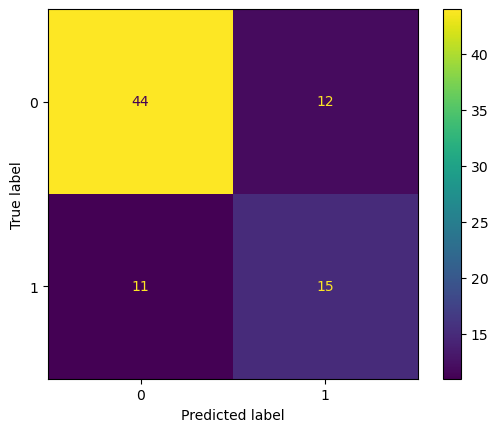


Evaluation: roc


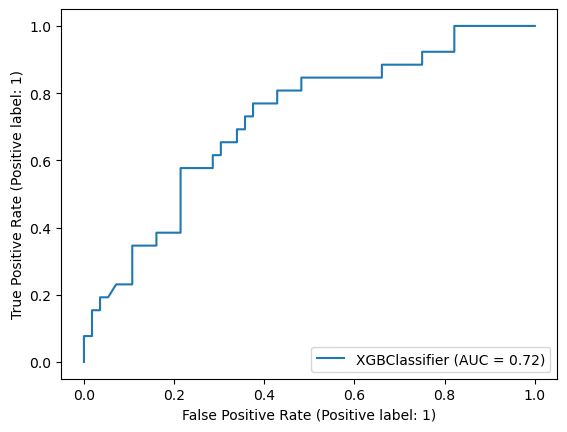

[(0.9689922480620154, 0.7195121951219512),
 (0.9696969696969696, 0.5660377358490566),
 (0.9922480620155039, 0.5769230769230769),
 (0.9481481481481482, 0.5555555555555556)]

In [23]:
print('Accuracy best model: {} evaluation'.format(type(best_model_dict2['accuracy']).__name__))
model_eval(best_model_dict2['accuracy'], X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)

Recall best model: LogisticRegression evaluation

Evaluation: accuracy_score
60.85% for the train data
46.34% for the test data

Evaluation: f1_score
71.87% for the train data
54.17% for the test data

Evaluation: recall_score
100.00% for the train data
100.00% for the test data

Evaluation: precision_score
56.09% for the train data
37.14% for the test data

Evaluation: confusion_matrix


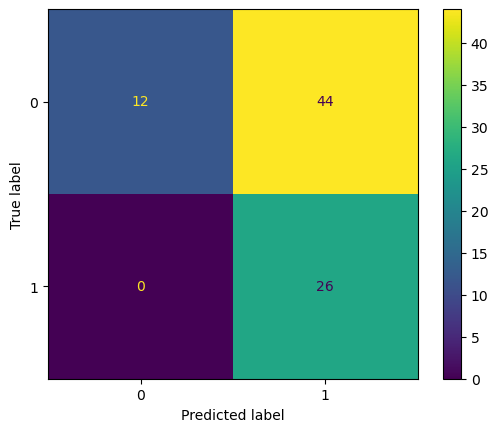


Evaluation: roc


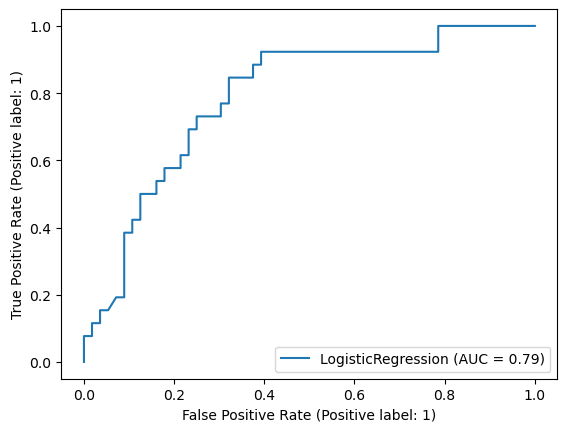

[(0.6085271317829457, 0.4634146341463415),
 (0.7186629526462395, 0.5416666666666666),
 (1.0, 1.0),
 (0.5608695652173913, 0.37142857142857144)]

In [24]:
print('Recall best model: {} evaluation'.format(type(best_model_dict2['recall']).__name__))
model_eval(best_model_dict2['recall'], X_train2, X_test2, y_train2, y_test2, confusion=True, roc=True)